# Classification models for a real application: the Heart dataset

Nicolas Desan (ENSIIE) & Alexandre WILK (M2QF/ENSIIE)

The "SAheart.txt" data contains n = 462 sample of males in a heart-disease high-risk of the Western Cape, South Africa and comes from a larger dataset realised in 1983.

For each case there are two controls of CHD and many positive CHD men undergo programs to reduce their risk factors. Some measurements were made after these treatments.

"SAheart.txt" contains the following informations : 

sbp		systolic blood pressure <br>
tobacco		cumulative tobacco (kg) <br>
ldl		low densiity lipoprotein cholesterol adiposity <br>
famhist		family history of heart disease (Present, Absent) <br>
typea		type-A behavior obesity <br>
alcohol		current alcohol consumption <br>
age		age at onset <br>
chd		response, coronary heart disease <br>

In [19]:
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import math  

import pandas as pd
import numpy as np 

# Decision Tree 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

#Model Description

from sklearn.tree import export_text 

#Models

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [5]:
tab=pd.read_csv("SAheart.txt", delimiter=",")
#print(tab)
np.shape(tab)

(462, 11)

The aim of the work is to study the classification models Decision Tree, Bagging and Random Forest to predict the value of the "chd" response variable (Y) given the covariables (X). 




In [6]:
Y = tab["chd"]
Xnum = tab.loc[:,['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
X=Xnum.to_numpy()

## Training and Test Separation

In [7]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 


## Decision Tree

--- DecisionTree ---
Accuracy: 0.7311827956989247
Precision: 0.5384615384615384
Recall: 0.5185185185185185
F1-score: 0.5283018867924528


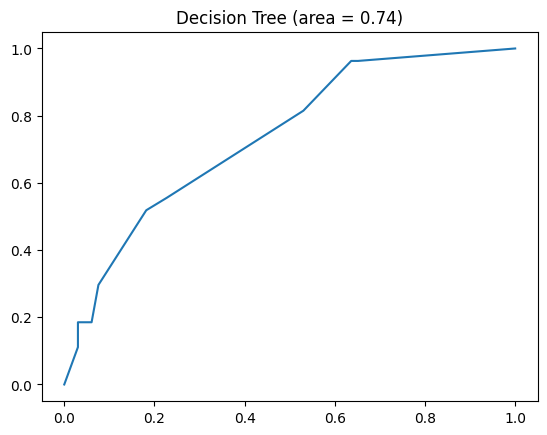

In [7]:
#DecisionTree

model1 = DecisionTreeClassifier()

#Hyperparameter tuning, performed with cross-validation to avoid over-fitting
params = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
}

grid_search1 = GridSearchCV(model1, params, cv=5)
#Model is trained and parameters (as well as hyperparameters) are cross-validated
grid_search1.fit(X_train, y_train)


#Prediction
y_pred1 = grid_search1.predict(X_test)
tree_prob = grid_search1.predict_proba(X_test)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_prob[:, 1])
plt.plot(tree_fpr, tree_tpr)
plt.title('Decision Tree (area = %0.2f)' % roc_auc_score(y_test, tree_prob[:, 1]))
# Évaluation
print("--- DecisionTree ---")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1-score:", f1_score(y_test, y_pred1))

## Bagging

--- Bagging ---
Accuracy: 0.7741935483870968
Precision: 0.6666666666666666
Recall: 0.4444444444444444
F1-score: 0.5333333333333333


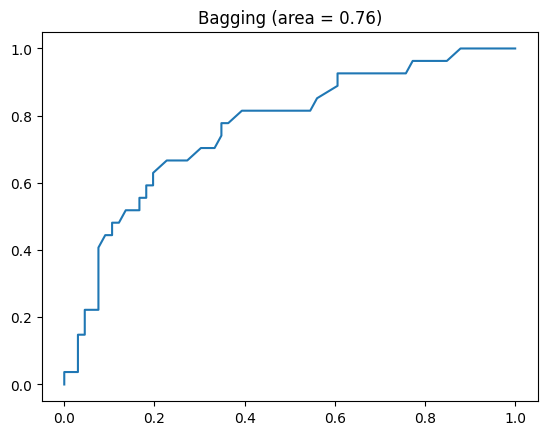

In [14]:
#Bagging

model2 = BaggingClassifier()

#Hyperparameter tuning, performed with cross-validation to avoid over-fitting
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}


grid_search2 = RandomizedSearchCV(model2, params, n_iter=20,cv=5)
#Model is trained and parameters (as well as hyperparameters) are cross-validated
grid_search2.fit(X_train, y_train)

#Prediction
y_pred2 = grid_search2.predict(X_test)
bag_prob = grid_search2.predict_proba(X_test)
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_prob[:, 1])
plt.plot(bag_fpr, bag_tpr)
plt.title('Bagging (area = %0.2f)' % roc_auc_score(y_test, bag_prob[:, 1]))
# Évaluation
print("--- Bagging ---")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1-score:", f1_score(y_test, y_pred2))

## RandomForestClassifier

--- Random Forest Classifier ---
Accuracy: 0.7526881720430108
Precision: 0.6111111111111112
Recall: 0.4074074074074074
F1-score: 0.4888888888888889


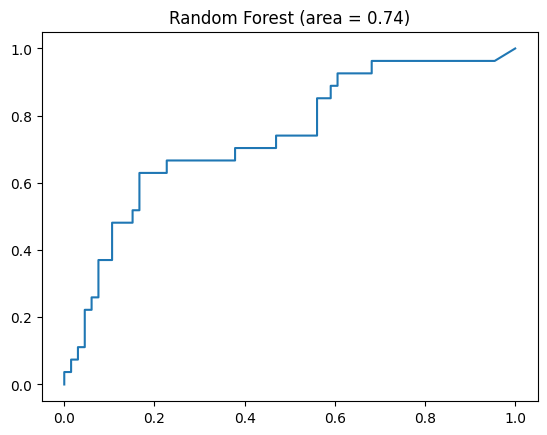

In [16]:
#RandomForestClassifier

model3 = RandomForestClassifier()

#Hyperparameter tuning, performed with cross-validation to avoid over-fitting
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_search3 = RandomizedSearchCV(model3, params, n_iter=20,cv=5)
#Model is trained and parameters (as well as hyperparameters) are cross-validated
grid_search3.fit(X_train, y_train)

#Prediction
y_pred3 = grid_search3.predict(X_test)
forest_prob = grid_search3.predict_proba(X_test)
forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_prob[:, 1])
plt.plot(forest_fpr, forest_tpr)
plt.title('Random Forest (area = %0.2f)' % roc_auc_score(y_test, forest_prob[:, 1]))
# Évaluation
print("--- Random Forest Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))
print("F1-score:", f1_score(y_test, y_pred3))

## Adaboost 

--- AdaboostClassifier ---
Accuracy: 0.6236559139784946
Precision: 0.3181818181818182
Recall: 0.25925925925925924
F1-score: 0.2857142857142857


Gradient Boosting Error on the complete training set %5.2f-> 0.3763440860215054


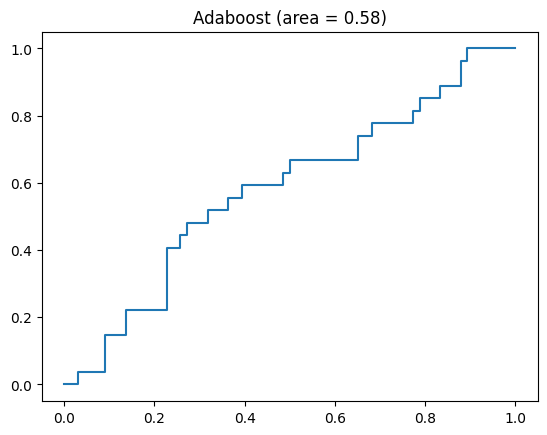

In [25]:
model4 = AdaBoostClassifier(n_estimators=200, random_state=0)

#Hyperparameter tuning, performed with cross-validation to avoid over-fitting
#params = {
#    'n_estimators': [10, 50, 100, 200],
#    'learning_rate': [0.01, 0.1, 1, 10],
#    'base_estimator__max_depth': [1, 2, 3, 4, 5]
#}


#grid_search4 = RandomizedSearchCV(model4, params, n_iter=20,cv=5)
#Model is trained and parameters (as well as hyperparameters) are cross-validated

grid_search4 = model4
grid_search4.fit(X_train, y_train)

#Prediction
y_pred4 = grid_search4.predict(X_test)
ada_prob = grid_search4.predict_proba(X_test)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_prob[:, 1])
plt.plot(ada_fpr, ada_tpr)
plt.title('Adaboost (area = %0.2f)' % roc_auc_score(y_test, ada_prob[:, 1]))
# Évaluation
print("--- AdaboostClassifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))
print("Recall:", recall_score(y_test, y_pred4))
print("F1-score:", f1_score(y_test, y_pred4))

print("\n")

# Error

E_all=(y_test != y_pred4).sum()/len(y_test)
print("Gradient Boosting Error on the complete training set %5.2f->",E_all)


## Gradient Boosting



--- Gradient Boosting ---
Accuracy: 0.6236559139784946
Precision: 0.3181818181818182
Recall: 0.25925925925925924
F1-score: 0.2857142857142857


Gradient Boosting Error on the complete training set %5.2f-> 0.27956989247311825


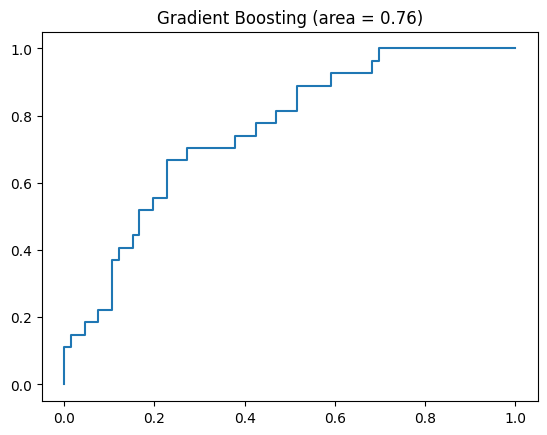

In [23]:
model5 = GradientBoostingClassifier(random_state=0)

#Hyperparameter tuning, performed with cross-validation to avoid over-fitting
#params = {
#}


#grid_search4 = RandomizedSearchCV(model5, params, n_iter=20,cv=5)
#Model is trained and parameters (as well as hyperparameters) are cross-validated

grid_search5 = model5
grid_search5.fit(X_train, y_train)

#Prediction
y_pred5 = grid_search5.predict(X_test)
gradient_prob = grid_search5.predict_proba(X_test)
gradient_fpr, gradient_tpr, _ = roc_curve(y_test, gradient_prob[:, 1])
plt.plot(gradient_fpr, gradient_tpr)
plt.title('Gradient Boosting (area = %0.2f)' % roc_auc_score(y_test, gradient_prob[:, 1]))
# Évaluation
print("--- Gradient Boosting ---")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))
print("Recall:", recall_score(y_test, y_pred4))
print("F1-score:", f1_score(y_test, y_pred4))

print("\n")

# Error

E_all=(y_test != y_pred5).sum()/len(y_test)
print("Gradient Boosting Error on the complete training set %5.2f->",E_all)
